<a href="https://colab.research.google.com/github/vivekbiragoni/social_computing/blob/main/sc_assignmetn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import convert

In [ ]:
!pip install powerlaw

import torch

def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

!pip install torch-scatter     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse      -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster     -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric


Looking in links: https://pytorch-geometric.com/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 97.6 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 45.3 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 39.2 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.1.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 932.1/932.1 kB 18.4 MB/s eta 0:00:00
  Using cached torch_geometric-2.4.0-py3-none-any.whl (1.0 MB)


In [ ]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import degree
import pandas as pd


# Load data from files
node_file_path = '/content/sample_data/NA.cnode'
edge_file_path = '/content/sample_data/NA.cedge'


# Read node data
node_data = pd.read_csv(node_file_path, header=None, names=['Node ID', 'X Coordinate', 'Y Coordinate'], delimiter=' ')
x = torch.tensor(node_data[['X Coordinate', 'Y Coordinate']].values, dtype=torch.float)

#  Read edge data
edge_data = pd.read_csv(edge_file_path, header=None, names=['Edge ID', 'Start Node ID', 'End Node ID', 'L2 Distance'], delimiter=' ')
edge_index = torch.tensor(edge_data[['Start Node ID', 'End Node ID']].values.transpose(), dtype=torch.long)

# Create PyG Data object
data = Data(x=x, edge_index=edge_index)

# Calculate degrees
deg = degree(data.edge_index[0], num_nodes=data.num_nodes)

# Calculate average degree
avg_degree = deg.float().mean().item()

print(f"Average Degree: {avg_degree}")

Average Degree: 1.0191453695297241


In [ ]:
import torch
from torch_geometric.data import Data

# Initialize lists to store node features and edge indices
node_features = []
edge_indices = []

# Read node data and add features to the list
with open(node_file_path, 'r') as node_file:
    for line in node_file:
        node_id, x, y = map(float, line.strip().split())
        node_features.append([x, y])

# Read edge data and add indices to the list
with open(edge_file_path, 'r') as edge_file:
    for line in edge_file:
        edge_id, start_node, end_node, distance = map(float, line.strip().split())
        edge_indices.append([start_node, end_node])

# Convert lists to PyTorch tensors
x = torch.tensor(node_features, dtype=torch.float)
edge_index = torch.tensor(edge_indices, dtype=torch.long).t().contiguous()
# edge_index = torch.tensor(edge_indices, dtype=torch.long)

# Ensure that the edge indices are in the correct shape
edge_index = edge_index.view(2, -1)

# Create PyG Data object
data = Data(x=x, edge_index=edge_index)

# Print the PyG Data object
print(data)


Data(x=[175813, 2], edge_index=[2, 179179])


In [ ]:
# Print sample node data
print("Sample Node Data:")
print(node_data.head())

# Print sample edge data
print("\nSample Edge Data:")
print(edge_data.head())

# Print sample node features (x)
print("Sample Node Features (x):")
print(x[:5])  # Print the first 5 rows for example

# Print sample edge connections (edge_index)
print("\nSample Edge Connections (edge_index):")
print(edge_index[:, :6])  # Print the first 5 columns for example


Sample Node Data:
   Node ID  X Coordinate  Y Coordinate
0        0   3565.246826   3489.291748
1        1   3567.920898   3479.724365
2        2   3565.295166   3490.652832
3        3   3564.935059   3490.473633
4        4   3564.358887   3492.821533

Sample Edge Data:
   Edge ID  Start Node ID  End Node ID  L2 Distance
0        0              0            1     9.934056
1        1              0            2     1.361942
2        2              2            3     0.402231
3        3              3            4     2.417563
4        4              4            5     4.921632
Sample Node Features (x):
tensor([[3565.2468, 3489.2917],
        [3567.9209, 3479.7244],
        [3565.2952, 3490.6528],
        [3564.9351, 3490.4736],
        [3564.3589, 3492.8215]])

Sample Edge Connections (edge_index):
tensor([[0, 0, 2, 3, 4, 5],
        [1, 2, 3, 4, 5, 6]])


In [ ]:
from torch_geometric.utils import degree

# Calculate degrees
deg = degree(data.edge_index[0], num_nodes=data.num_nodes)

# Print the degrees
print(deg)


tensor([2., 1., 1.,  ..., 1., 1., 0.])


tensor([2., 1., 1.,  ..., 1., 1., 0.])

Node Degree 	 Frequency
2.0 		 4668
1.0 		 164485
3.0 		 1369
0.0 		 5024
4.0 		 170
5.0 		 52
7.0 		 17
6.0 		 20
8.0 		 4
9.0 		 2
11.0 		 2


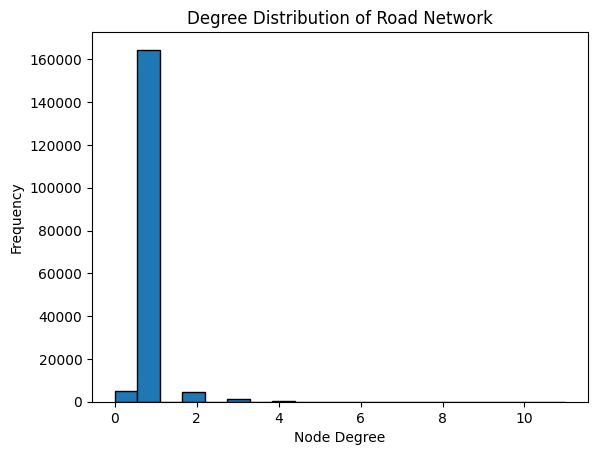

In [ ]:
from torch_geometric.utils import degree

# Calculate degrees
deg = degree(data.edge_index[0], num_nodes=data.num_nodes)

# Print the degrees
print(deg)



# Count the frequencies of unique degrees
degree_counts = dict()
for d in deg.numpy():
    degree_counts[d] = degree_counts.get(d, 0) + 1

# Print out the unique degrees and their frequencies
print("\nNode Degree \t Frequency")
for degree, frequency in degree_counts.items():
    print(f"{degree} \t\t {frequency}")

# Plot the degree distribution
plt.hist(deg.numpy(), bins=20, edgecolor='black')
plt.title('Degree Distribution of Road Network')
plt.xlabel('Node Degree')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Convert PyG Data to NetworkX graph
G = convert.to_networkx(data)

# Visualize the graph using NetworkX and Matplotlib
pos = nx.spring_layout(G)  # You can use other layout algorithms as well
nx.draw(G, pos, with_labels=True, node_size=50)
plt.title('Graph Visualization')
plt.show()

KeyboardInterrupt: 

In [ ]:
# Assuming the files are in the same directory as your script or notebook
node_file_path = '/content/sample_data/NA.cnode'
edge_file_path = '/content/sample_data/NA.cedge'


# Create an undirected graph
G = nx.Graph()

# Read node data and add nodes to the graph
with open(node_file_path, 'r') as node_file:
    for line in node_file:
        node_id, x, y = map(float, line.strip().split())
        G.add_node(node_id, pos=(x, y))

# Read edge data and add edges to the graph
with open(edge_file_path, 'r') as edge_file:
    for line in edge_file:
        edge_id, start_node, end_node, distance = map(float, line.strip().split())
        G.add_edge(start_node, end_node, weight=distance)

# Calculate the average degree
average_degree = sum(dict(G.degree()).values()) / len(G)

print(f"Average Degree: {average_degree}")


Average Degree: 2.037414753175249


Node Degree 	 Frequency
2 		 166810
4 		 1563
3 		 4767
1 		 2385
5 		 178
6 		 62
8 		 15
7 		 22
9 		 7
10 		 1
12 		 1
11 		 1
14 		 1


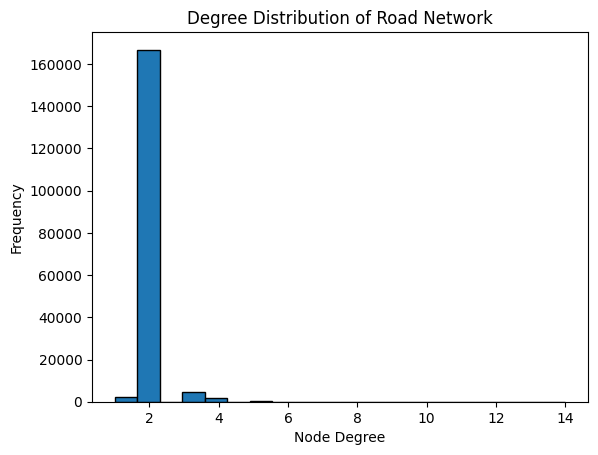

In [ ]:
# Calculate the degree of each node
degrees = dict(G.degree())
# Extract degree values
degree_sequence = list(degrees.values())

# Count the frequencies of unique degrees
degree_counts = dict()
for degree in degree_sequence:
    degree_counts[degree] = degree_counts.get(degree, 0) + 1

# Print out the unique degrees and their frequencies
print("Node Degree \t Frequency")
for degree, frequency in degree_counts.items():
    print(f"{degree} \t\t {frequency}")

# Plot the degree distribution
plt.hist(degrees.values(), bins=20, edgecolor='black')
plt.title('Degree Distribution of Road Network')
plt.xlabel('Node Degree')
plt.ylabel('Frequency')
plt.show()

- **Node Degree 2:** This is the most frequent degree, indicating a large number of nodes with only two connections. As discussed earlier, this could represent straight road segments connecting two intersections or locations.

- **Node Degrees 3, 4, 5, etc.:** These represent nodes with slightly higher degrees, indicating intersections or locations where multiple roads converge. The frequencies decrease as the degree increases.

- **Higher Node Degrees (6 and above):** These correspond to nodes with even higher connectivity, likely representing major intersections or hubs in the road network.

The distribution reflects the network's topology, highlighting the prevalence of nodes with lower degrees and a few nodes with higher degrees.

Calculating best minimal value for power law fit


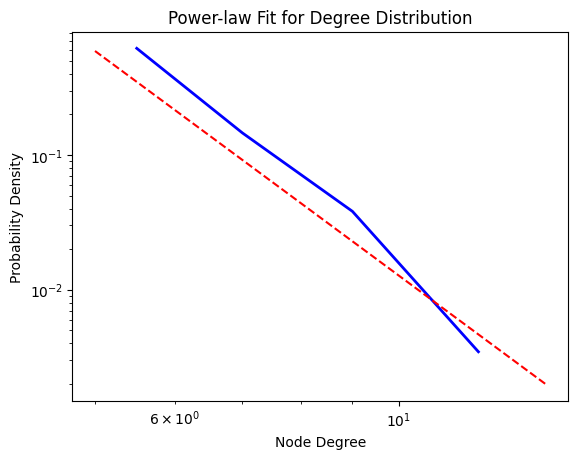

Power-law alpha parameter: 5.528201638046653


In [ ]:
import powerlaw

# Extract degree values
degree_sequence = list(degrees.values())

# Fit the power-law distribution
fit = powerlaw.Fit(degree_sequence, discrete=True)

# Plot the data and the fitted power-law distribution
fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=plt.gca())

plt.title('Power-law Fit for Degree Distribution')
plt.xlabel('Node Degree')
plt.ylabel('Probability Density')
plt.show()

# Display the fitted alpha parameter for the power-law distribution
print(f'Power-law alpha parameter: {fit.alpha}')

In [ ]:
# Diameter
diameter = nx.diameter(G)
print(f"Diameter of the Network: {diameter}")

In [ ]:
# Average Path Length
average_path_length = nx.average_shortest_path_length(G, weight='weight')
print(f"Average Path Length: {average_path_length}")

In [ ]:
# Shortest Path
source_node = 1  # Replace with the actual source node ID
target_node = 100  # Replace with the actual target node ID
shortest_path = nx.shortest_path(G, source=source_node, target=target_node, weight='weight')
shortest_path_length = nx.shortest_path_length(G, source=source_node, target=target_node, weight='weight')
print(f"Shortest Path from Node {source_node} to Node {target_node}: {shortest_path}")
print(f"Shortest Path Length: {shortest_path_length}")

Shortest Path from Node 1 to Node 100: [1, 7.0, 8.0, 9.0, 10.0, 12.0, 17.0, 19.0, 20.0, 24.0, 26.0, 31.0, 38.0, 39.0, 40.0, 58.0, 59.0, 66.0, 74.0, 77.0, 78.0, 84.0, 85.0, 87.0, 89.0, 93.0, 97.0, 99.0, 100]
Shortest Path Length: 225.621309


In [ ]:
import networkx as nx

# Assuming G is your graph
source_node = 1  # Replace with your source node ID
target_node = 10  # Replace with your target node ID

# Check if there is a path between the nodes
if nx.has_path(G, source_node, target_node):
    geodesic_length = nx.shortest_path_length(G, source=source_node, target=target_node)
    print(f"The geodesic path length between {source_node} and {target_node} is {geodesic_length}.")
else:
    print(f"There is no path between {source_node} and {target_node} in the graph.")


The geodesic path length between 1 and 10 is 4.


In [ ]:
clustering_coefficients = nx.clustering(G)

# Calculate average clustering coefficient for the entire graph
average_clustering_coefficient = nx.average_clustering(G)

# Print results
for node, cc in clustering_coefficients.items():
    print(f"Clustering coefficient for node {node}: {cc}")

print(f"\nAverage clustering coefficient for the graph: {average_clustering_coefficient}")

Streaming output truncated to the last 5000 lines.
Clustering coefficient for node 170815.0: 0
Clustering coefficient for node 170816.0: 0
Clustering coefficient for node 170817.0: 0
Clustering coefficient for node 170818.0: 0
Clustering coefficient for node 170819.0: 0
Clustering coefficient for node 170820.0: 0
Clustering coefficient for node 170821.0: 0
Clustering coefficient for node 170822.0: 0
Clustering coefficient for node 170823.0: 0
Clustering coefficient for node 170824.0: 0
Clustering coefficient for node 170825.0: 0
Clustering coefficient for node 170826.0: 0
Clustering coefficient for node 170827.0: 0
Clustering coefficient for node 170828.0: 0
Clustering coefficient for node 170829.0: 0
Clustering coefficient for node 170830.0: 0
Clustering coefficient for node 170831.0: 0
Clustering coefficient for node 170832.0: 0
Clustering coefficient for node 170833.0: 0
Clustering coefficient for node 170834.0: 0
Clustering coefficient for node 170835.0: 0
Clustering coefficient fo

In [ ]:
scc_count = nx.number_strongly_connected_components(G)

# Print the result
print(f"Number of Strongly Connected Components: {scc_count}")

NetworkXNotImplemented: not implemented for undirected type

In [ ]:
wcc_count = nx.number_weakly_connected_components(G)

# Print the result
print(f"Number of Weakly Connected Components: {wcc_count}")

NetworkXNotImplemented: not implemented for undirected type

In [ ]:
components = list(nx.connected_components(G))

giant_component = max(components, key=len)

# Create a subgraph for the giant component
giant_subgraph = G.subgraph(giant_component)

# Calculate properties for the giant component
shortest_path = nx.shortest_path(giant_subgraph)
average_path_length = nx.average_shortest_path_length(giant_subgraph)
diameter = nx.diameter(giant_subgraph)
average_clustering_coefficient = nx.average_clustering(giant_subgraph)

# Print the results
print(f"Shortest Path in Giant Component: {shortest_path}")
print(f"Average Path Length in Giant Component: {average_path_length}")
print(f"Diameter of Giant Component: {diameter}")
print(f"Average Clustering Coefficient in Giant Component: {average_clustering_coefficient}")

In [ ]:
k_components = nx.k_components(G)

# Print the results for each k
for k, components in k_components.items():
    print(f"Number of {k}-Connected Components: {len(components)}")

# You can also get specific components for a given k value
specific_k = 2  # Replace with the desired k value
specific_components = k_components[specific_k]
print(f"Components for {specific_k}-Connected Graphs: {specific_components}")